# EDA & Data Preprocessing on Google App Store Rating Dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("Apps_data.csv") 

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
data.head() #Q-2 starting 5 samples of data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail() #Ending 5 samples of data 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
data.shape # shape of data

(10841, 13)

In [6]:
data.info() # info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building

In [7]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
- App : 9660 unique values. Top value seems to ROBOLOX. We could have duplicate entries here.
- Category - There are 34 categories and 120 genres. Family is a Top category. 
- Rating - min value is 1 and max is 19 ( which seems like a miss)
- Reviews - there are ~600 apps with zero reviews
- Size - Many app size varies with device and rest are in MBs
- Installs - many apps have very high install count
- Type - Most of the apps are free. There are only three categories here.
- Price - More than 10k apps are free of cost
- Content Rating - Most of teh apps are for everyone
- And Ver. - 4.1 and up is reqd for most of the apps
- Type and Price could be highly correlated
- Category and Genre could be highly correlated

#### Need to be worked on before model building:
1. We can drop Last Updated, Current Ver, and Andriod Ver as they have too many categories and are not very importatnt in prediction the rating

2. App name can be dropped after doing basic analysis

3. Category Column - Important to have. Requires feature engineering

4. Reviews - Need to convert it to numeric column

5. Installs - Need to convert it to numeric column

6. Type - Convert it to numeric

7. Price - Need to remove $ from the values and make it numeric

8. Content Rating - Requires encoding

9. Genre - Important to have. Requires feature engineering to make it numeric

4. Check if there are any duplicate records in the dataset? if any drop them.

In [8]:
data['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

In [9]:
data[data['App'].isin(['ROBLOX', 'ESPN','Nick'])].sort_values(by = 'App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
917,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
2226,Nick,FAMILY,4.2,123322,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
6086,Nick,FAMILY,4.2,123309,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up


In [10]:
data.drop_duplicates('App', inplace = True) # dropping duplicates

In [11]:
data['App'].value_counts().head(20)

Photo Editor & Candy Camera & Grid & ScrapBook        1
CK Pharmacies                                         1
CK Call NEW                                           1
Ck Coif                                               1
CONTRACT KILLER: ZOMBIES                              1
CK Shop                                               1
FlexBook                                              1
Can Knockdown 3                                       1
Fu*** Weather (Funny Weather)                         1
OB-GYN USMLE Stp2 CK 300 Q & A                        1
CK Active                                             1
USMLE CK Clinical Knowledge Flashcards 2018 Ed        1
Night Camera Blur Effect                              1
Camera V7 24 Megapixel                                1
CL Mobile Pro - Classifieds for Craigslist            1
cloudLibrary                                          1
CL Reader for Craigslist(For sale, jobs, rental..)    1
INFAMY RO                                       

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [12]:
data['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [13]:
data[data['Category'] == '1.9'] # dropping this category which is invalid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
data.drop([10472],inplace=True) # dropping with row number

In [15]:
data['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [16]:
data.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
data.dropna(inplace=True)# drop NAN values

In [18]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [19]:
Rating_cat = dict()
for i in range(0,len(data['Rating'])):
    if data['Rating'].iloc[i] >= 3.5:
        Rating_cat[i] = 'High'
    else: Rating_cat[i] = 'Low'
        
#Add the categorical column to the data 
data = data.assign(Rating_cat = pd.Series(Rating_cat).values)

In [20]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

In [21]:
data['Rating_cat'].value_counts(normalize = True)*100

High    91.245421
Low      8.754579
Name: Rating_cat, dtype: float64

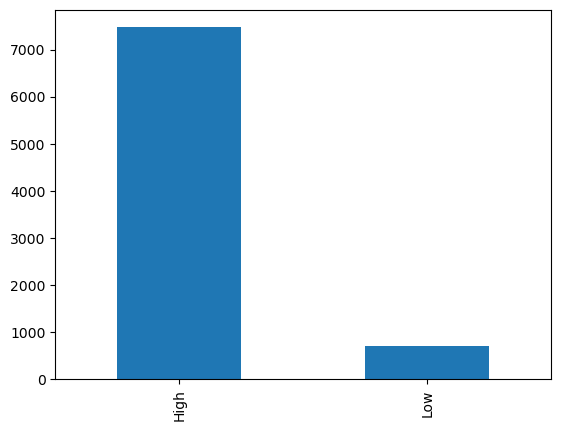

In [22]:
data['Rating_cat'].value_counts().plot(kind = 'bar')
plt.show()

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)

In [23]:

data['Reviews'].dtype

dtype('O')

In [24]:
data['Reviews'] = pd.to_numeric(data.Reviews, errors = 'coerce')# converting Reviews to numeric

In [25]:
data['Reviews'].dtype

dtype('int64')

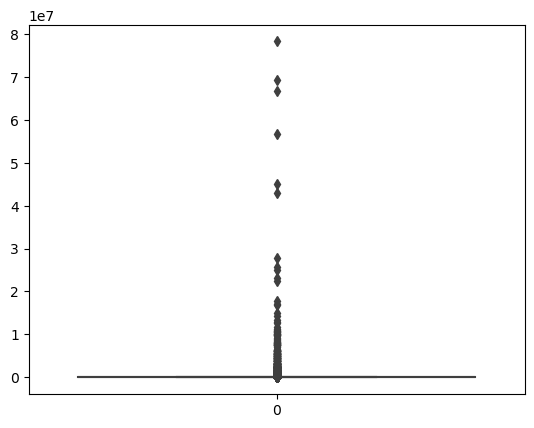

In [26]:
sns.boxplot(data['Reviews'])
plt.show()

In [27]:
data['Reviews'] = np.log(data['Reviews']) # reducing skewness using log transformation approach

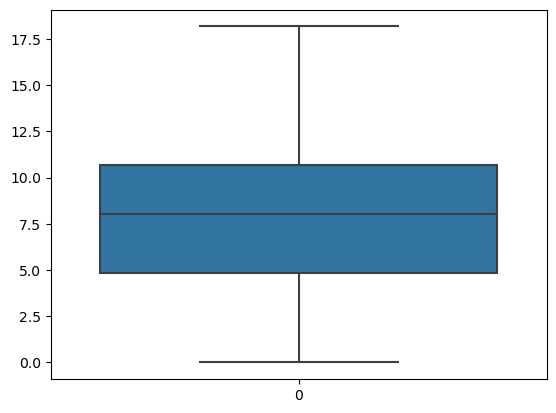

In [28]:
sns.boxplot(data['Reviews'])
plt.show() #Boxplot after transformation

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')


In [29]:
data['Size'].head(5)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [30]:
data = data[data['Size'] != 'Varies with device']

In [31]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.784190,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,4.0,1.945910,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High


In [32]:
#Replace M with 1 million and k with 1 thousand

def convert(entry):
        if entry[-1] == 'k':
            new_entry = float(entry.replace('k',''))*1000
        else:
            new_entry = float(entry.replace('M',''))*1000000
        return new_entry

In [33]:
data['Size'] = data['Size'].apply(lambda x : convert(x))

In [34]:
data['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [35]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [36]:
data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','')

In [37]:
data['Installs'] = pd.to_numeric(data['Installs'], errors = 'coerce')

In [38]:
data['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [39]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [40]:
data['Price'] = data['Price'].str.replace('$', '')

In [41]:
data['Price'] = pd.to_numeric(data['Price'], errors = 'coerce')

In [42]:
data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7021 non-null   object 
 1   Category        7021 non-null   object 
 2   Rating          7021 non-null   float64
 3   Reviews         7021 non-null   float64
 4   Size            7021 non-null   float64
 5   Installs        7021 non-null   int64  
 6   Type            7021 non-null   object 
 7   Price           7021 non-null   float64
 8   Content Rating  7021 non-null   object 
 9   Genres          7021 non-null   object 
 10  Last Updated    7021 non-null   object 
 11  Current Ver     7021 non-null   object 
 12  Android Ver     7021 non-null   object 
 13  Rating_cat      7021 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 822.8+ KB


12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis

In [44]:
data = data.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [45]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,High


13. Encode the categorical columns.


In [46]:
object_type_variables = [i for i in data.columns if data.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(data):
    for i in object_type_variables:
        q = le.fit_transform(data[i].astype(str))  
        data[i] = q                               
        data[i] = data[i].astype(int)
encoder(data)

In [47]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8700000.0,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2800000.0,100000,0,0.0,1,0


14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [48]:
X = data.drop('Rating_cat',axis=1)
y = data['Rating_cat']

15. Split the dataset into train and test.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4914, 7) (2107, 7)
(4914,) (2107,)


16. Standardize the data, so that the values are within a particular range

In [50]:
mm = MinMaxScaler()

X_train.iloc[:,:] = mm.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = mm.transform(X_test.iloc[:,:])

In [51]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2842,0.75000,0.476262,0.044919,1.999998e-03,0.0,0.000000,0.2
6534,0.43750,0.354274,0.058920,9.998000e-06,1.0,0.017475,0.8
3341,0.90625,0.736005,0.046919,2.000000e-02,0.0,0.000000,0.2
7534,0.46875,0.062351,0.399949,9.800000e-08,0.0,0.000000,0.2
2817,0.75000,0.524675,0.109924,1.999998e-03,0.0,0.000000,0.2


In [52]:
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6285,0.84375,0.627872,0.109924,0.00200,0.0,0.0,0.6
4305,0.43750,0.440562,0.619968,0.00020,0.0,0.0,0.2
4837,0.43750,0.530204,0.959997,0.00200,0.0,0.0,0.8
6062,0.75000,0.359139,0.016916,0.00002,0.0,0.0,0.2
6044,0.18750,0.110439,0.002995,0.00001,0.0,0.0,0.2
